In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker

In [6]:
!pip install xlrd

     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     -------------------------------------- - 92.2/96.5 kB 5.5 MB/s eta 0:00:01
     ---------------------------------------- 96.5/96.5 kB 1.4 MB/s eta 0:00:00


In [128]:
!pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/85/7d/58635941dfbb5b4e197adb88080b9cbfb230dc3b75683698a530a1989bdb/Cython-3.0.8-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -----------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [138]:
df = pd.read_excel('./Sample - Superstore.xls')
df_sample = pd.read_excel('./Sample - Superstore.xls')

In [139]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [140]:
df.shape

(9994, 21)

In [141]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [142]:
df.drop('Row ID',axis = 1, inplace = True) 
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [143]:
df.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [144]:
df.set_index("Order Date", inplace = True)

In [145]:
print(df.isnull().sum())

Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [146]:
Top_customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(20)
Top_customers = Top_customers[["Sales"]].round(2) 
Top_customers.reset_index(inplace=True)

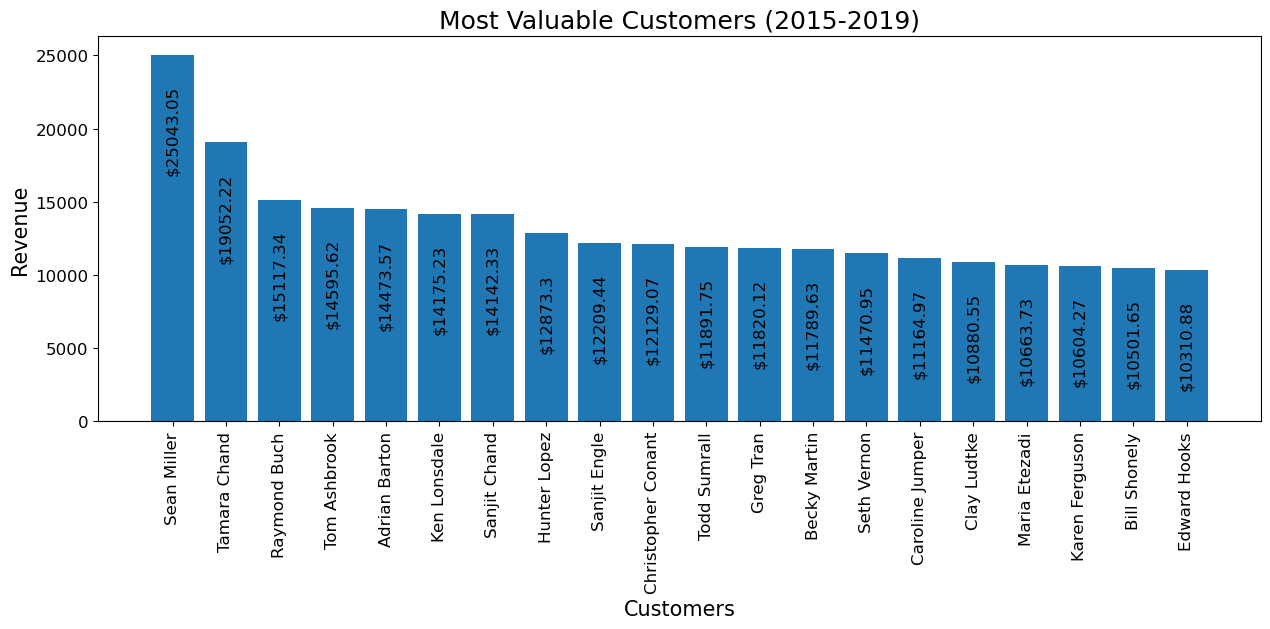

In [147]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("Most Valuable Customers (2015-2019)", fontsize=18) 
plt.bar(Top_customers["Customer Name"], Top_customers["Sales"])
plt.xlabel("Customers",fontsize=15) # x axis shows the customers 
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_customers["Sales"].items(): #To show the exact revenue generated on the figure
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [148]:
Top_states = df.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(20)
Top_states = Top_states[["Sales"]].round(2) 
Top_states.reset_index(inplace=True) 

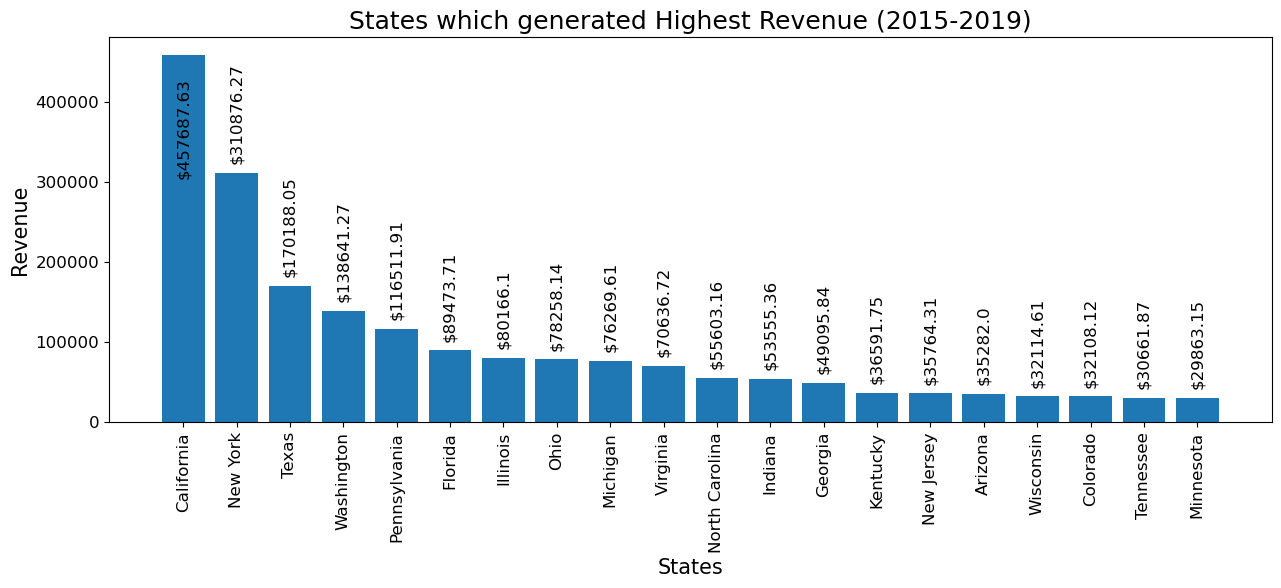

In [149]:
plt.figure(figsize = (15,5)) 
plt.title("States which generated Highest Revenue (2015-2019)", fontsize=18) 
plt.bar(Top_states["State"], Top_states["Sales"])
plt.xlabel("States",fontsize=15) 
plt.ylabel("Revenue",fontsize=15) 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_states["Sales"].items(): 
    if v>400000:
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [150]:
Top_cities = df.groupby(["City"]).sum().sort_values("Sales", ascending=False).head(20) 
Top_cities = Top_cities[["Sales"]].round(2) 
Top_cities.reset_index(inplace=True) 

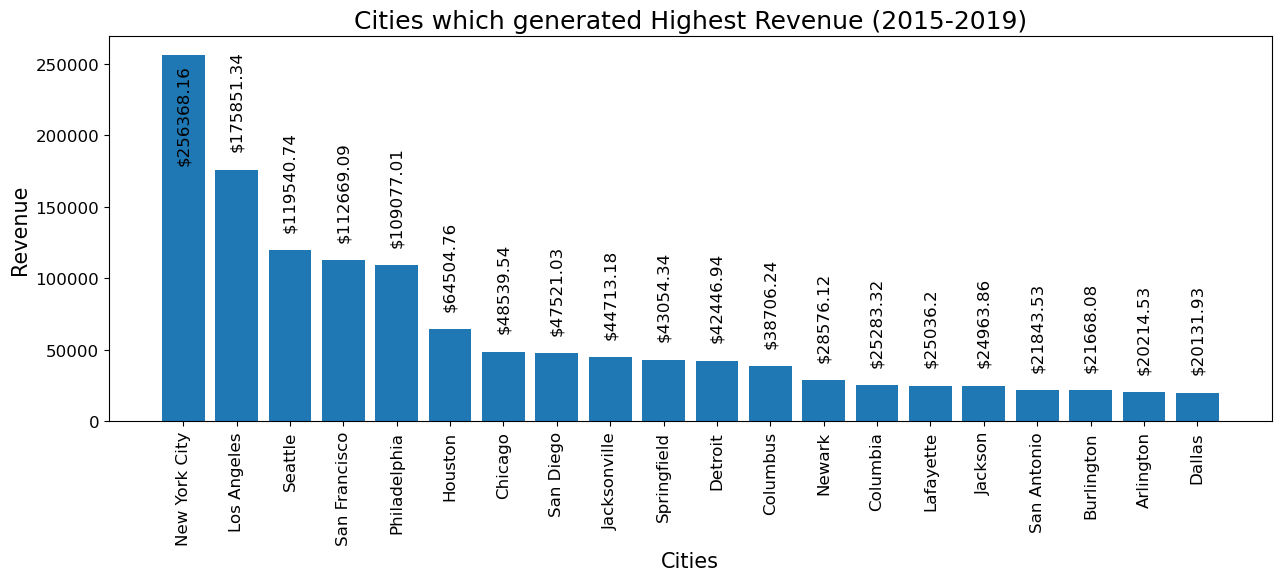

In [151]:
plt.figure(figsize = (15,5)) 
plt.title("Cities which generated Highest Revenue (2015-2019)", fontsize=18)
plt.bar(Top_cities["City"], Top_cities["Sales"])
plt.xlabel("Cities",fontsize=15)  
plt.ylabel("Revenue",fontsize=15)  
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_cities["Sales"].items(): 
    if v>250000:
        plt.text(k,v-75000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [152]:
Top_category = df.groupby(["Category"]).sum().sort_values("Sales", ascending=False)  
Top_category = Top_category[["Sales"]] 
Top_category.reset_index(inplace=True) 

In [153]:
Top_category.head()

,Category,Sales
0,Technology,836154.0330
1,Furniture,741999.7953
2,Office Supplies,719047.0320


<Axes: ylabel='Sales'>

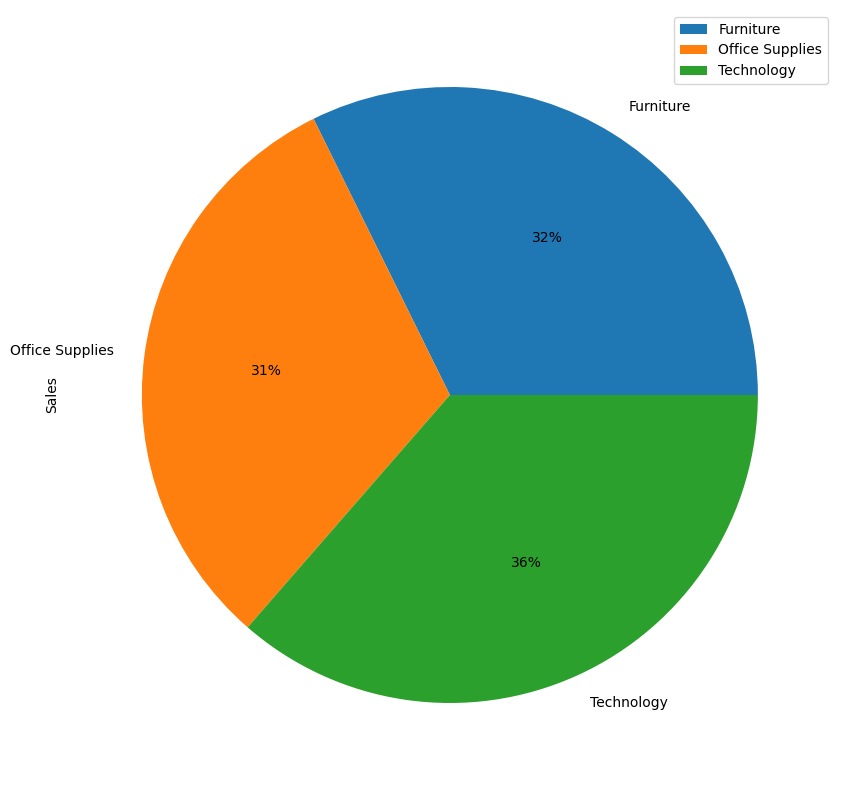

In [154]:
Top_category.groupby(['Category']).sum().plot( 
    kind='pie', y='Sales', autopct='%1.0f%%') 

In [155]:
Top_products = df.groupby(["Product Name"]).sum().sort_values("Sales",ascending=False).head(8)
Top_products = Top_products[["Sales"]].round(2)
Top_products.reset_index(inplace=True) 

In [156]:
Top_products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.82
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.58
4,GBC DocuBind TL300 Electric Binding System,19823.48
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.50
6,Hewlett Packard LaserJet 3310 Copier,18839.69
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.90


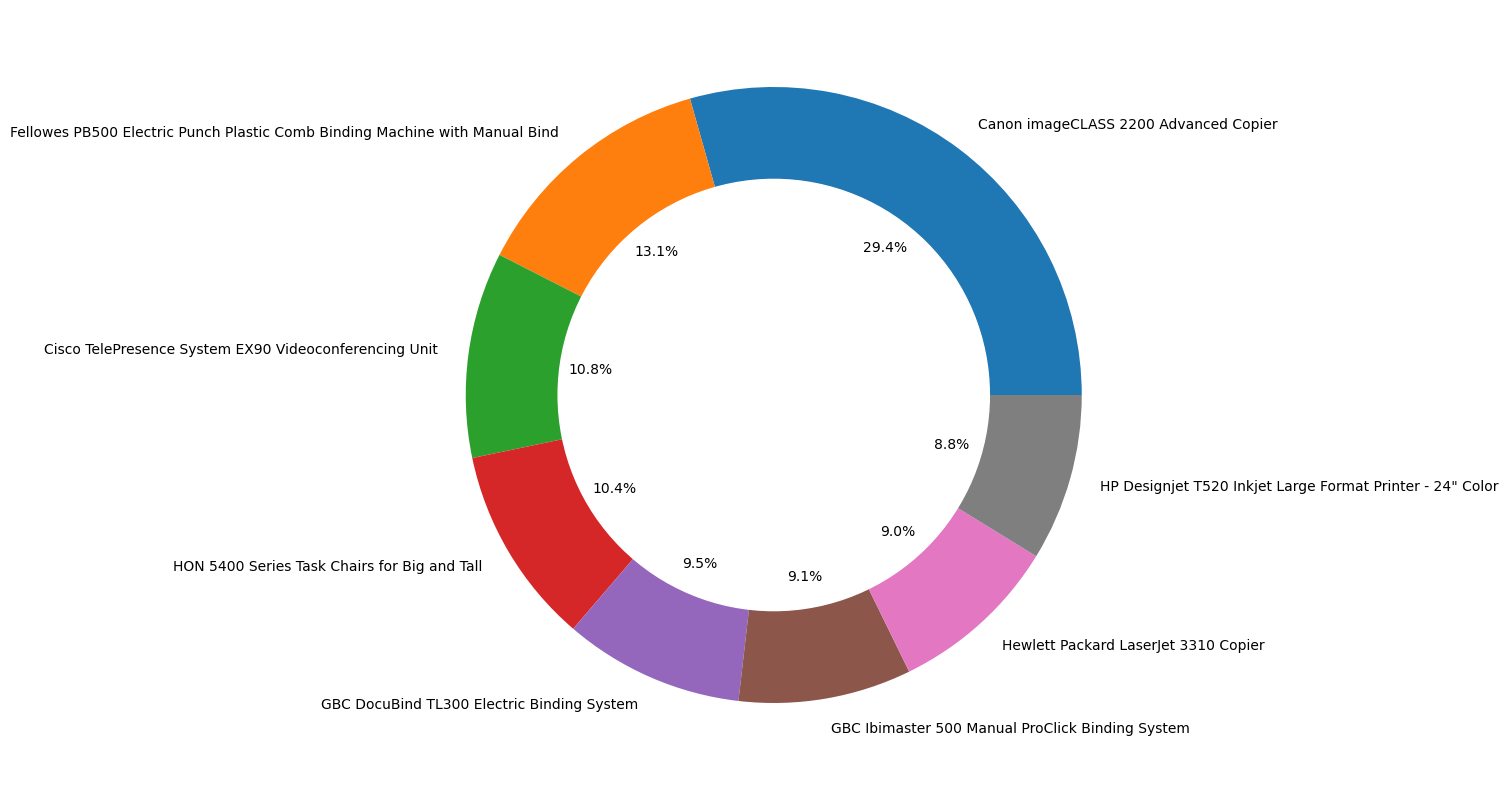

In [157]:
#Top_products.groupby(['Product Name']).sum().plot(     kind='pie', y='Sales', autopct='%1.0f%%')
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(Top_products['Sales'], labels=Top_products['Product Name'], autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
# Show the graph
plt.show()

In [158]:
Top_subcat = df.groupby(['Category','Sub-Category']).sum().sort_values("Sales", ascending=False).head(10)
Top_subcat = Top_subcat[["Sales"]].astype(int)
Top_subcat = Top_subcat.sort_values("Category") 
Top_subcat.reset_index(inplace=True) 
Top_subcat_1 = Top_subcat.groupby(['Category']).sum() 
Top_subcat_1.reset_index(inplace=True) 

In [159]:
Top_subcat.head()

,Category,Sub-Category,Sales
0,Furniture,Chairs,328449
1,Furniture,Tables,206965
2,Furniture,Bookcases,114879
3,Office Supplies,Storage,223843
4,Office Supplies,Binders,203412


In [160]:
Top_subcat_1

,Category,Sales
0,Furniture,650293
1,Office Supplies,534787
2,Technology,836153


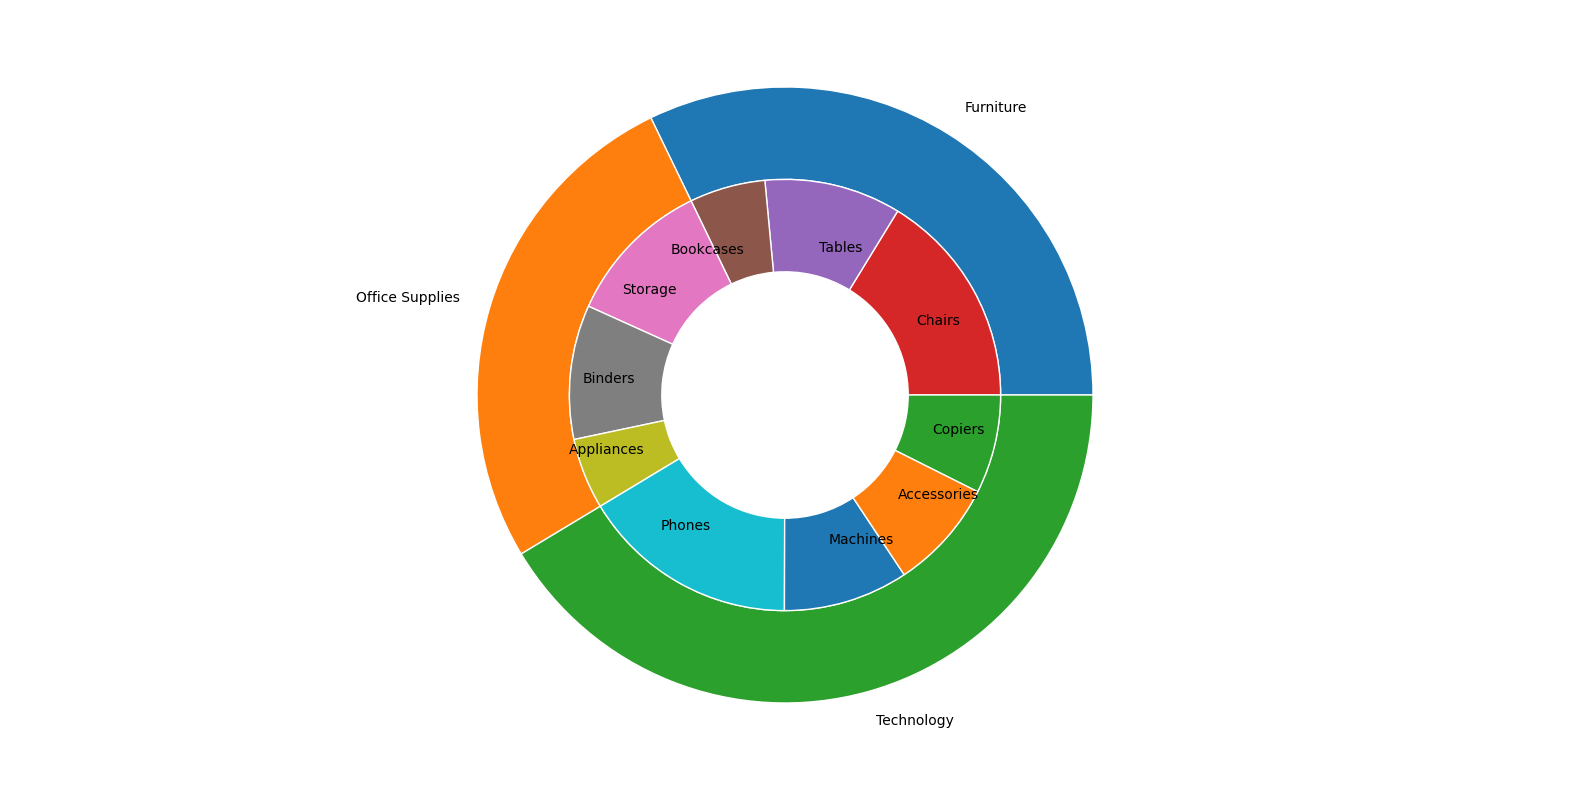

In [161]:
fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

# Outer ring
#cm = plt.get_cmap("tab20c")
pie, _ = ax.pie(Top_subcat_1['Sales'], radius=1, labels=Top_subcat_1['Category'])
plt.setp(pie, width=width, edgecolor='white')

# Inner ring
#cin = cm(np.array([1,2,5,6,9,10]))
pie2, _ = ax.pie(Top_subcat['Sales'], radius=1-width, labels=Top_subcat['Sub-Category'],
                 labeldistance=0.7)
plt.setp(pie2, width=width, edgecolor='white')
plt.show()

In [162]:
Top_segment = df.groupby(["Segment"]).sum().sort_values("Sales", ascending=False) 
Top_segment = Top_segment[["Sales"]] 
Top_segment.reset_index(inplace=True) 
Top_segment.head()

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


<Axes: ylabel='Sales'>

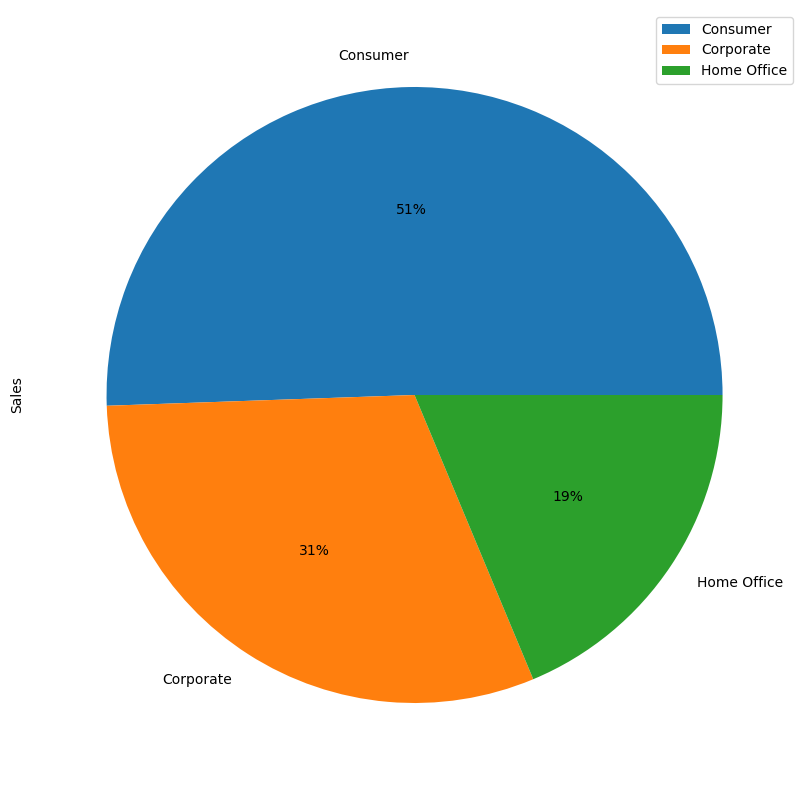

In [163]:
Top_segment.groupby(['Segment']).sum().plot( 
    kind='pie', y='Sales', autopct='%1.0f%%') 

In [164]:
Top_region = df.groupby(["Region"]).sum().sort_values("Sales", ascending=False)
Top_region = Top_region[["Sales"]].astype(int)
Top_region.reset_index(inplace=True)
Top_region.head()

,Region,Sales
0,West,725457
1,East,678781
2,Central,501239
3,South,391721


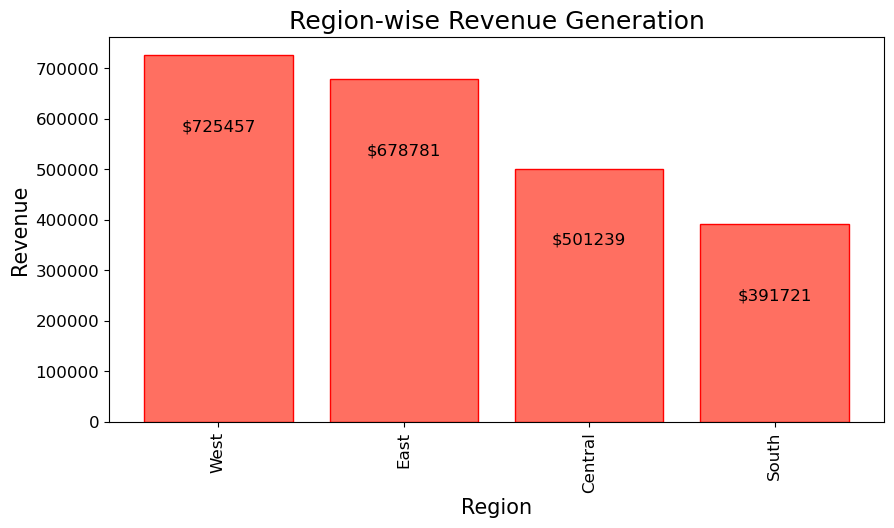

In [165]:
plt.figure(figsize = (10,5)) 
plt.title("Region-wise Revenue Generation", fontsize=18)
plt.bar(Top_region["Region"], Top_region["Sales"],color= '#FF6F61',edgecolor='Red', linewidth = 1)
plt.xlabel("Region",fontsize=15) 
plt.ylabel("Revenue",fontsize=15) 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_region["Sales"].items(): 
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,color='k', horizontalalignment='center');

In [166]:
Top_shipping = df.groupby(["Ship Mode"]).sum().sort_values("Sales", ascending=False) 
Top_shipping = Top_shipping[["Sales"]] 
Top_shipping.reset_index(inplace=True) 
Top_shipping.head()

,Ship Mode,Sales
0,Standard Class,1.358216e+06
1,Second Class,4.591936e+05
2,First Class,3.514284e+05
3,Same Day,1.283631e+05


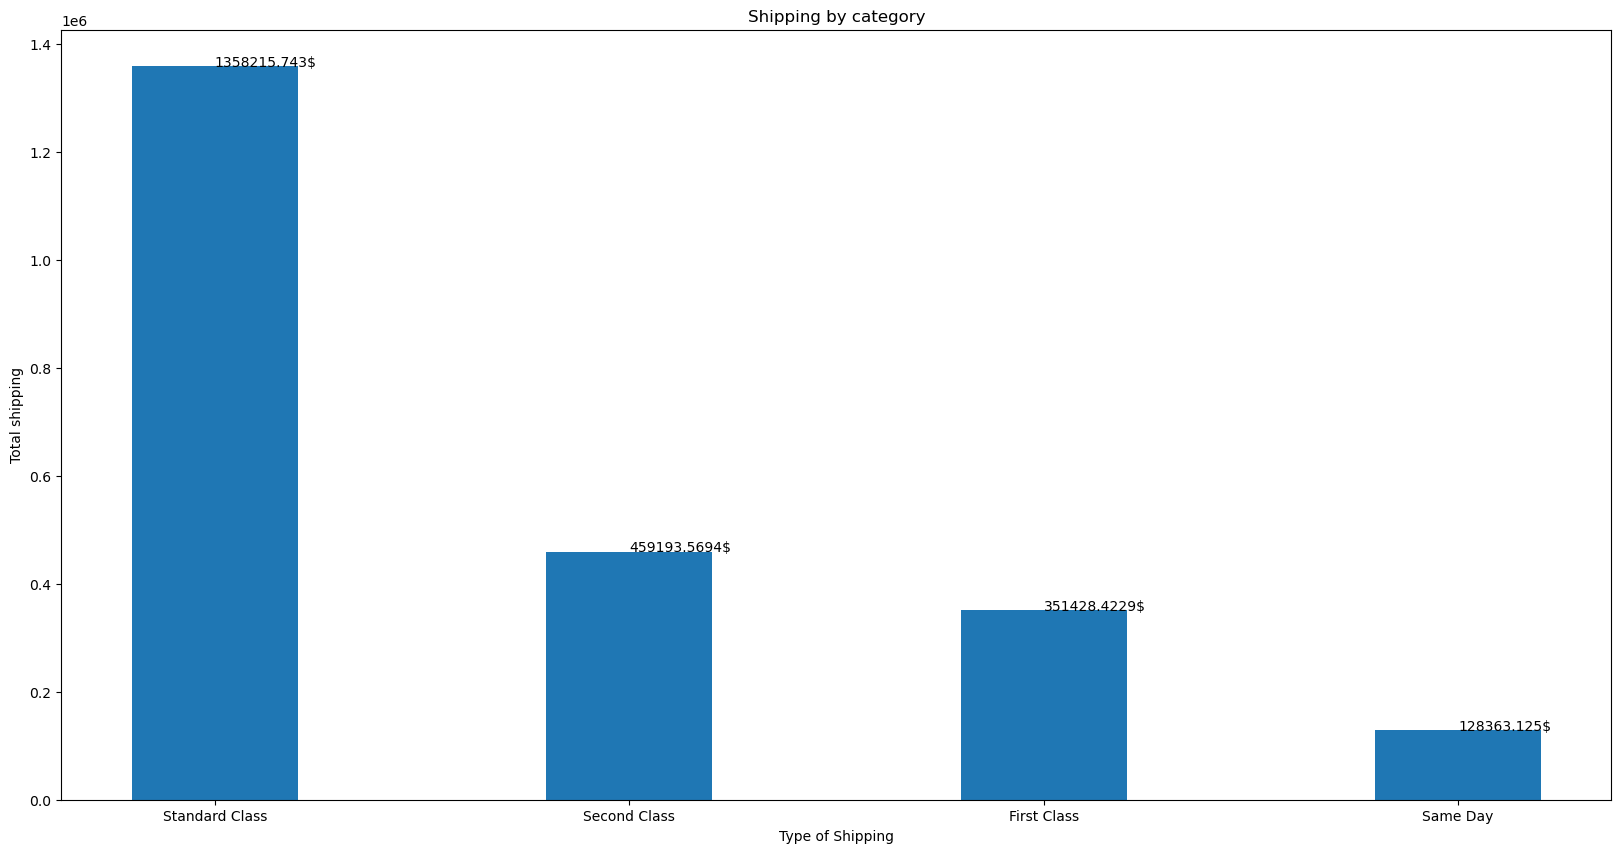

In [167]:
plt.bar(Top_shipping['Ship Mode'], Top_shipping['Sales'],width = 0.4)
 
plt.xlabel("Type of Shipping")
plt.ylabel("Total shipping")
plt.title("Shipping by category")
for index,data in enumerate(Top_shipping['Sales']):
    plt.text(x=index , y =data+1 , s=f"{data}$" )
plt.show()

In [168]:
df = pd.read_excel('./Sample - Superstore.xls')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [169]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [170]:
df.drop('Row ID',axis = 1, inplace = True)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y') 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [171]:
print('Order Date Description\n') 
print(df['Order Date'].describe()) 
print('\nShip Date Description\n')
print(df['Ship Date'].describe()) 

Order Date Description

count                    9994
unique                   1237
top       2016-09-05 00:00:00
freq                       38
first     2014-01-03 00:00:00
last      2017-12-30 00:00:00
Name: Order Date, dtype: object

Ship Date Description

count                    9994
unique                   1334
top       2015-12-16 00:00:00
freq                       35
first     2014-01-07 00:00:00
last      2018-01-05 00:00:00
Name: Ship Date, dtype: object


In [172]:
df.sort_values(by=['Order Date'], inplace=True, ascending=True) 
df.set_index("Order Date", inplace = True)
df.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,
2014-01-03,CA-2014-103800,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2014-01-05,CA-2014-141817,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [173]:
new_data = pd.DataFrame(df['Sales'])
new_data

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,11.784
2014-01-04,272.736
2014-01-04,3.540
2014-01-05,19.536
...,...
2017-12-30,3.024
2017-12-30,52.776
2017-12-30,90.930


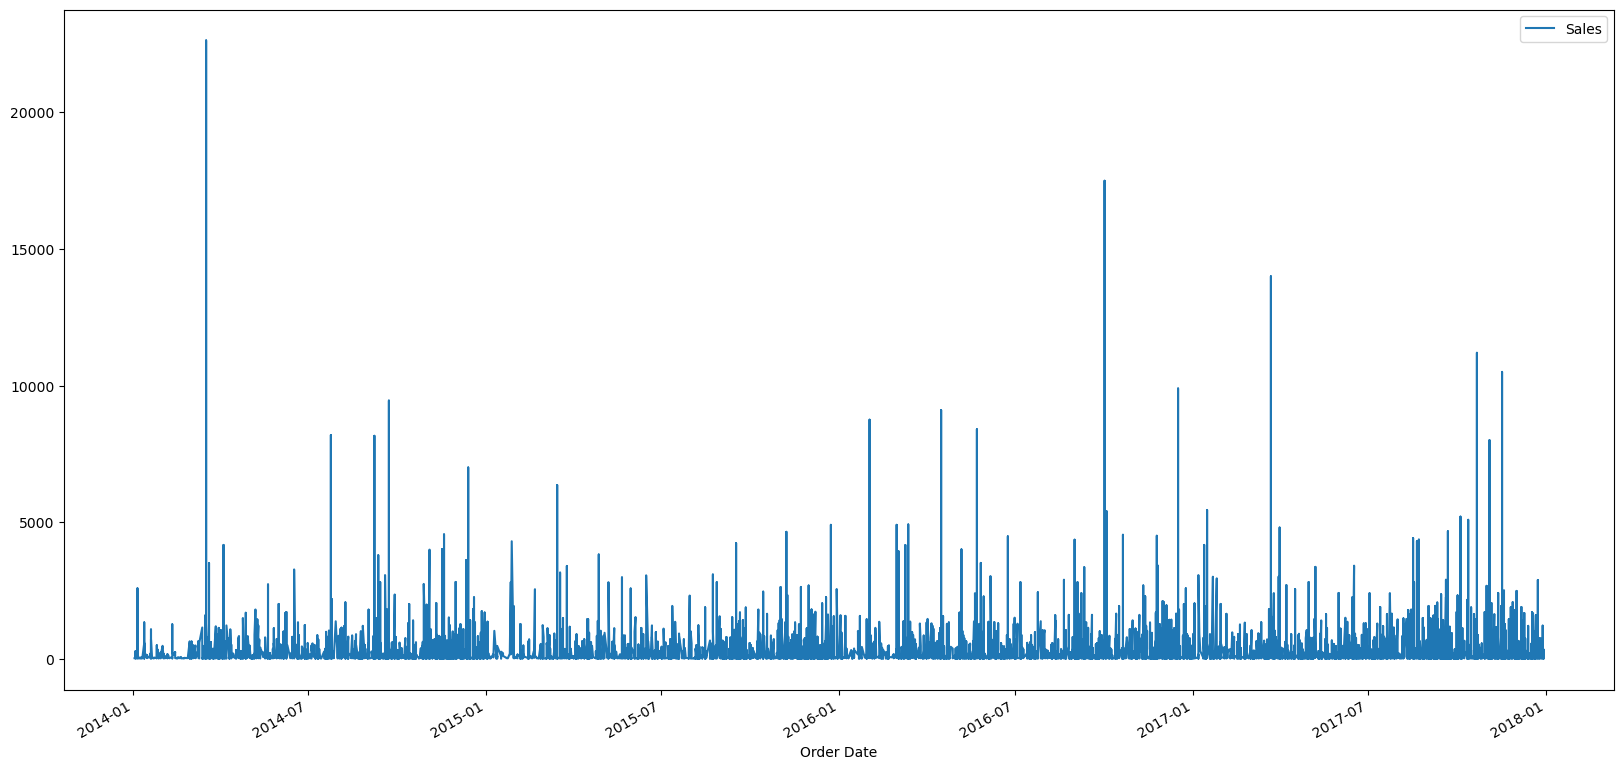

In [174]:
new_data.plot();

In [175]:
adf = adfuller(new_data) 
print(adf)
print('\nADF = ', str(adf[0])) #more towards negative value the better
print('\np-value = ', str(adf[1]))
print('\nCritical Values: ')
for key, val in adf[4].items(): #for loop to print the p-value (1%, 5% and 10%) and their respective values
    print(key,':',val)
    if adf[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary')

(-98.24719499581727, 0.0, 0, 9993, {'1%': -3.431004556246501, '5%': -2.8618292749021865, '10%': -2.5669239758928017}, 156387.38331822245)

ADF =  -98.24719499581727

p-value =  0.0

Critical Values: 
1% : -3.431004556246501
Null Hypothesis Rejected. Time Series is Stationary
5% : -2.8618292749021865
Null Hypothesis Rejected. Time Series is Stationary
10% : -2.5669239758928017
Null Hypothesis Rejected. Time Series is Stationary


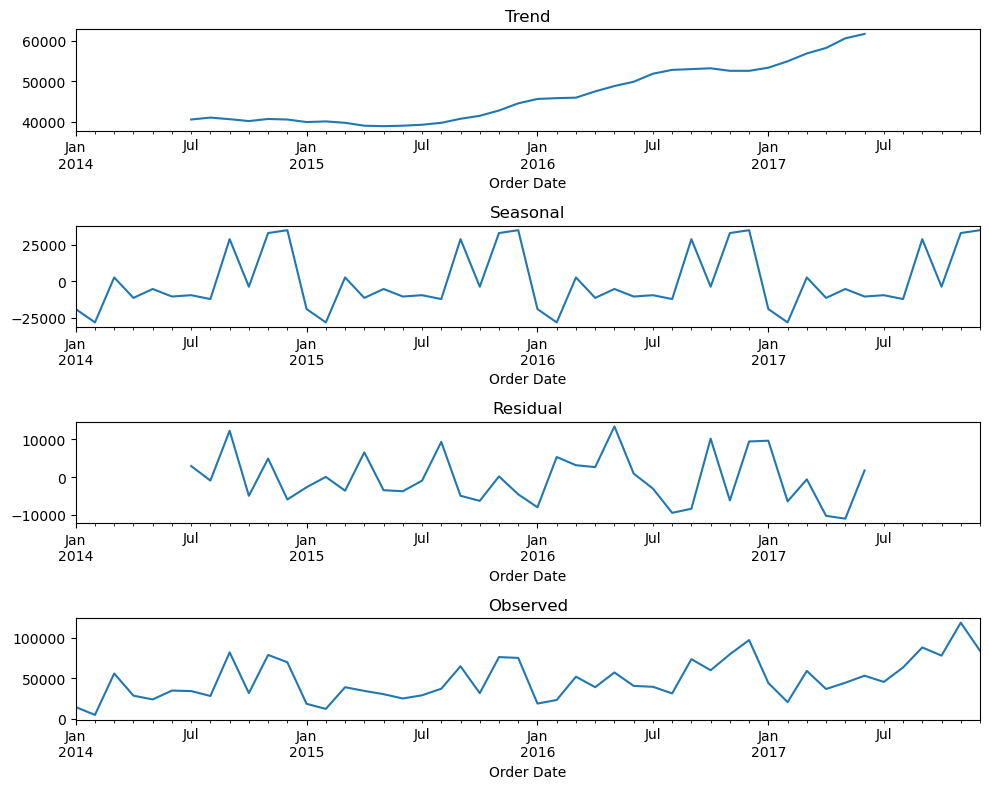

In [176]:
import statsmodels.api as sm

# Create a copy of the DataFrame to preserve the original "Order Date" column
df_copy = df_sample.copy()

# Ensure 'Order Date' is in datetime format in the copy
df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])

# Set 'Order Date' as the index in the copy
df_copy.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency and sum the sales for each month in the copy
df_monthly = df_copy['Sales'].resample('M').sum()

# Decompose the time series into monthly components
decomposition_monthly = sm.tsa.seasonal_decompose(df_monthly, model='additive')

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition_monthly.trend.plot(ax=axes[0])
axes[0].set_title('Trend')
decomposition_monthly.seasonal.plot(ax=axes[1])
axes[1].set_title('Seasonal')
decomposition_monthly.resid.plot(ax=axes[2])
axes[2].set_title('Residual')
decomposition_monthly.observed.plot(ax=axes[3])
axes[3].set_title('Observed')

plt.tight_layout()
plt.show()


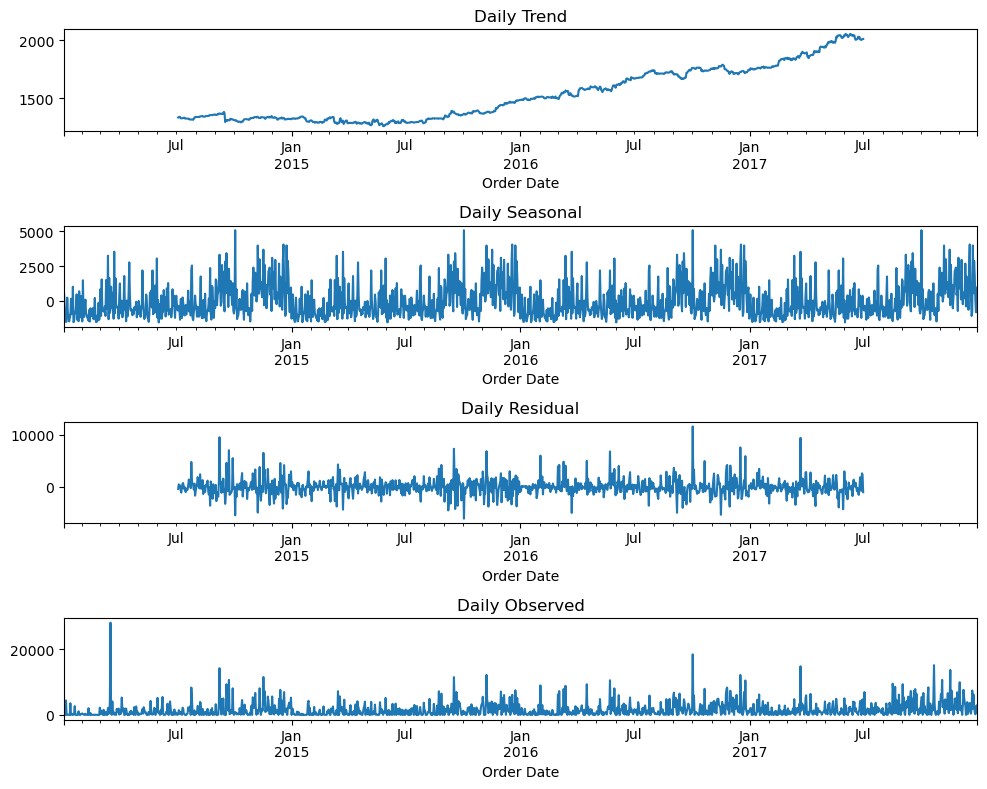

In [177]:
import statsmodels.api as sm

# Create a copy of the DataFrame to preserve the original "Order Date" column
df_copy = df_sample.copy()

# Ensure 'Order Date' is in datetime format in the copy
df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])

# Set 'Order Date' as the index in the copy
df_copy.set_index('Order Date', inplace=True)

# Resample the data to daily frequency and sum the sales for each day in the copy
df_daily = df_copy['Sales'].resample('D').sum()
# Decompose the time series into daily components
decomposition_daily = sm.tsa.seasonal_decompose(df_daily, model='additive',period=365)

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition_daily.trend.plot(ax=axes[0])
axes[0].set_title('Daily Trend')
decomposition_daily.seasonal.plot(ax=axes[1])
axes[1].set_title('Daily Seasonal')
decomposition_daily.resid.plot(ax=axes[2])
axes[2].set_title('Daily Residual')
decomposition_daily.observed.plot(ax=axes[3])
axes[3].set_title('Daily Observed')

plt.tight_layout()
plt.show()

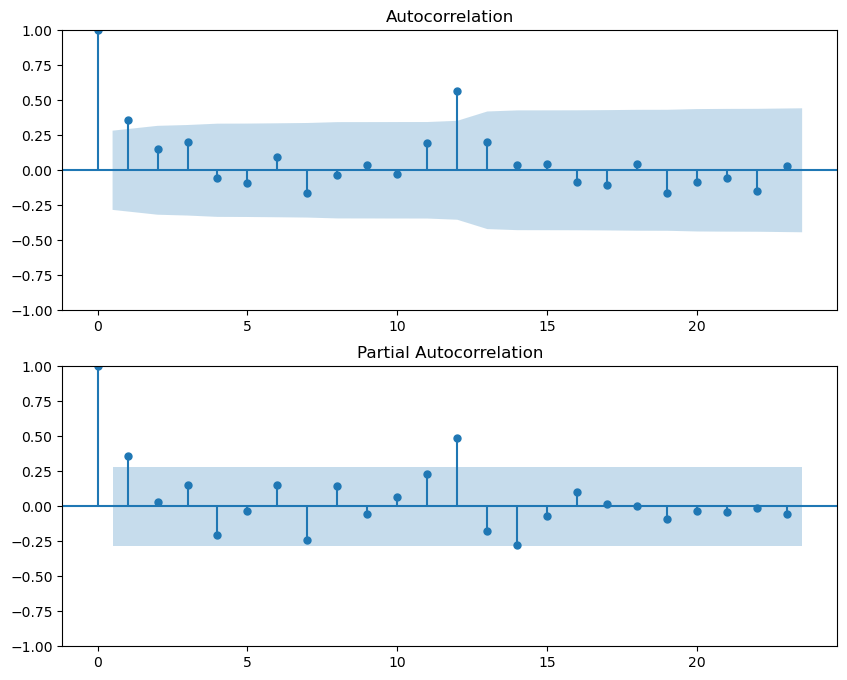

In [178]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a copy of the DataFrame to preserve the original data
df_copy = df_sample.copy()

# Convert the 'Order Date' column to datetime and set it as the index in the copy
df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])
df_copy.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency and sum the sales for each month in the copy
df_monthly = df_copy['Sales'].resample('M').sum()

# Create ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df_monthly, lags=23, ax=ax1)
plot_pacf(df_monthly, lags=23, ax=ax2)

plt.show()

In [179]:
df_copy = df_sample[['Order Date', 'Sales']].copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Sales       9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 156.3 KB


In [180]:
time_sales = df_copy.groupby("Order Date").sum()
time_sales.head(2)

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060


In [181]:
time_sales1 = time_sales.copy()
time_sales1.reset_index(inplace=True)

In [182]:
sale_monthly = time_sales1.resample('M', on='Order Date').mean()
sale_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-01-31 to 2017-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


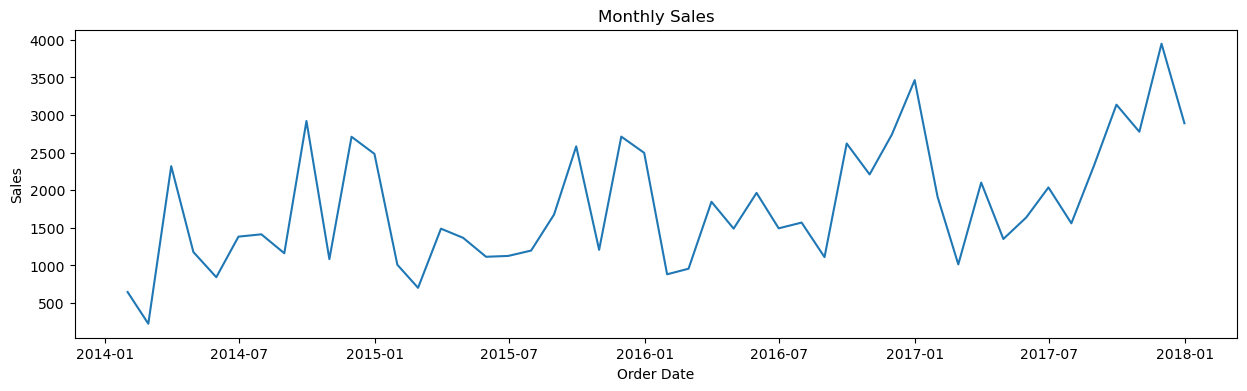

In [183]:
plt.figure(figsize=(15, 4))  
sns.lineplot(x='Order Date', y='Sales', data=sale_monthly)
plt.title('Monthly Sales')
plt.show()

In [184]:
from pmdarima import auto_arima

model_param = auto_arima(sale_monthly, seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=779.541, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=749.346, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=777.666, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=770.546, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=747.552, Time=0.51 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=760.262, Time=0.21 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=750.256, Time=1.44 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=749.441, Time=1.02 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=757.935, Time=0.47 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=742.403, T

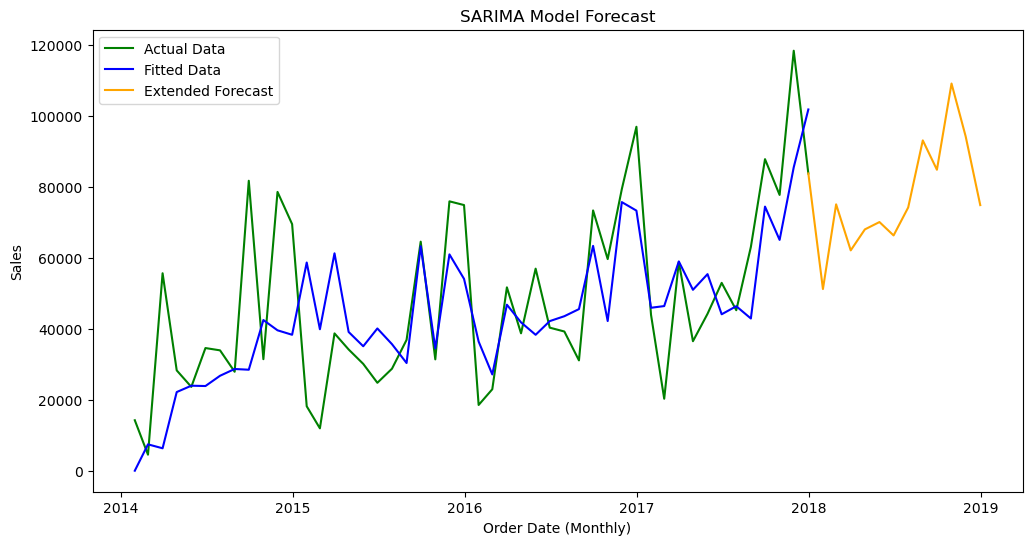

R-squared score for fitted data: 0.41


In [189]:
import statsmodels.api as sm

df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])

# Set 'Order Date' as the index
df_copy.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency and sum the sales for each month
df_monthly = df_copy['Sales'].resample('M').sum()

# Define SARIMA model hyperparameters, defined after fine tuning
order = (0, 1, 1)  # (p, d, q) - Non-seasonal order
seasonal_order = (1, 0, 1, 12)  # (P, D, Q, S) - Seasonal order

#order = (0, 1, 1)  # (p, d, q) - Non-seasonal order
#seasonal_order = (2, 1, 1, 12)  # (P, D, Q, S) - Seasonal order
# Initialize the SARIMA model
sarima_model = sm.tsa.SARIMAX(df_monthly, order=order, seasonal_order=seasonal_order)

# Fit the SARIMA model to all of the actual data
sarima_model_fit = sarima_model.fit()

# Make out-of-sample forecasts for the following twelve months
forecast_extended_index = pd.date_range(start=df_monthly.index[-1], periods=13, freq='M')
forecast_extended = sarima_model_fit.get_forecast(steps=13, index=forecast_extended_index)

# Set the first value of the extended forecast to be the last value of the actual data
forecast_extended.predicted_mean[0] = df_monthly.iloc[-1]

# Calculate R-squared score for the fitted data
fitted = sarima_model_fit.fittedvalues  # Fitted values for all the actual data
r2_fitted = 1 - np.sum((df_monthly - fitted) ** 2) / np.sum((df_monthly - np.mean(df_monthly)) ** 2)

# Plot the actual data, fitted data, and extended forecast
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly, label='Actual Data', color='green')
plt.plot(df_monthly.index, fitted, label='Fitted Data', color='blue')
plt.plot(forecast_extended_index, forecast_extended.predicted_mean, label='Extended Forecast', color='orange')

plt.legend()
plt.xlabel('Order Date (Monthly)')
plt.ylabel('Sales')
plt.title('SARIMA Model Forecast')
plt.show()

# Display R-squared score for the fitted data
print(f"R-squared score for fitted data: {r2_fitted:.2f}")